In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 20 06:42:17 2021

@author: John
"""

# importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm

%matplotlib inline
# %matplotlib notebook

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

# compare algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier

# Feature Selection with Univariate Statistical Tests
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

import csv
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# suppressing warnings ## NOT RECOMMENDED
import warnings
warnings.filterwarnings("ignore") 

In [3]:
# read dataset
df = pd.read_csv ('recs2015_public_v4.csv')

In [4]:
print (df.head())

   DOEID  REGIONC  DIVISION METROMICRO UATYP10  TYPEHUQ  ZTYPEHUQ  CELLAR  \
0  10001        4        10      METRO       U        2         0       0   
1  10002        3         7       NONE       R        2         0       0   
2  10003        3         6      METRO       U        2         0       1   
3  10004        2         4      MICRO       C        2         0       1   
4  10005        1         2      METRO       U        2         0       1   

   ZCELLAR  BASEFIN  ...  ZELAMOUNT  NGXBTU  PERIODNG  ZNGAMOUNT  FOXBTU  \
0        0       -2  ...          0  103.32         1          0  137.45   
1        0       -2  ...          1     NaN        -2         -2  137.45   
2        0        1  ...          0  100.14         1          0  137.45   
3        0        1  ...          0     NaN        -2         -2  137.45   
4        0        0  ...          0  102.83         1          0  137.45   

   PERIODFO  ZFOAMOUNT  LPXBTU  PERIODLP  ZLPAMOUNT  
0        -2         -2   9

In [5]:
print(df.shape)

(5686, 759)


In [6]:
# print(df.describe())

In [7]:
# manual feature selection

drop_list = []
with open('features_to_drop.csv', 'r', encoding="utf-8-sig", newline='') as file:
#     reader = csv.reader(file)
#     drop_list = list(reader)    
    for row in csv.reader(file):
        drop_list.append(row[0])
# print (drop_list)

In [8]:
df.drop(columns = drop_list, inplace = True)

In [9]:
print(df.head())

   REGIONC  DIVISION METROMICRO UATYP10  TYPEHUQ  CELLAR  BASEFIN  ATTIC  \
0        4        10      METRO       U        2       0       -2      0   
1        3         7       NONE       R        2       0       -2      0   
2        3         6      METRO       U        2       1        1      0   
3        2         4      MICRO       C        2       1        1      0   
4        1         2      METRO       U        2       1        0      1   

   ATTICFIN  STORIES  ...  PELLETAMT  PELLETBTU  ELXBTU  PERIODEL  NGXBTU  \
0        -2       20  ...       -2.0        0.0   3.412         1  103.32   
1        -2       10  ...       -2.0        0.0   3.412         5     NaN   
2        -2       10  ...       -2.0        0.0   3.412         1  100.14   
3        -2       10  ...       -2.0        0.0   3.412         1     NaN   
4         0       20  ...       -2.0        0.0   3.412         1  102.83   

   PERIODNG  FOXBTU  PERIODFO  LPXBTU  PERIODLP  
0         1  137.45        -2 

In [10]:
print(df.shape)

(5686, 389)


In [11]:
# manual target selection

target_list = []
with open('targets.csv', 'r', encoding="utf-8-sig", newline='') as file:
#     reader = csv.reader(file)
#     drop_list = list(reader)    
    for row in csv.reader(file):
        target_list.append(row[0])
print (target_list)

['EQUIPMUSE', 'TEMPHOME', 'TEMPGONE', 'TEMPNITE', 'USEWWAC', 'TEMPHOMEAC', 'TEMPGONEAC', 'TEMPNITEAC', 'HHAGE', 'EMPLOYHH', 'EDUCATION', 'NHSLDMEM', 'NUMADULT', 'NUMCHILD', 'ATHOME', 'MONEYPY']


In [12]:
# replace categorial data 
LE = LabelEncoder()
df['METROMICRO'] = LE.fit_transform(df['METROMICRO'])
df['UATYP10'] = LE.fit_transform(df['UATYP10'])
df['CLIMATE_REGION_PUB'] = LE.fit_transform(df['CLIMATE_REGION_PUB'])
df['IECC_CLIMATE_PUB'] = LE.fit_transform(df['IECC_CLIMATE_PUB'])

In [13]:
# removing INF and NaN values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(99999, inplace=True)

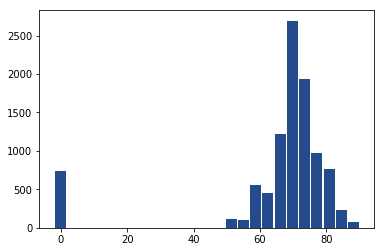

In [14]:
temp_targets = ['TEMPHOME', 'TEMPGONE', 'TEMPNITE', 'TEMPHOMEAC', 'TEMPGONEAC', 'TEMPNITEAC']

for target in temp_targets:
#     plt.hist(df[target], bins=25, rwidth=0.9, color='#244c8c', range=(50, df[target].max()))
    plt.hist(df[target], bins=25, rwidth=0.9, color='#244c8c')
#     plt.show()
    plt.savefig('output/'+target+'_hist_before.png', bbox_inches='tight', dpi=300)
#     df.hist(column=target, bins=100, grid='off', figsize=(8,6), color='#86bf91', zorder=2, rwidth=0.9)
#     df.hist(column=target,grid='off')

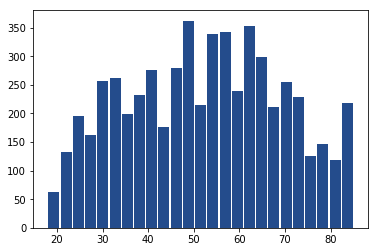

In [15]:
target = 'HHAGE'
plt.hist(df[target], bins=25, rwidth=0.9, color='#244c8c')
plt.savefig('output/'+target+'_hist_before.png', bbox_inches='tight', dpi=300)
# df.hist(column='HHAGE', grid='off', figsize=(8,6), color='#86bf91', zorder=2, rwidth=0.9)

In [16]:
def getAgeGroup(age):
    if age < 13:
        return 1
    elif age < 31:
        return 2
    elif age < 51:
        return 3
    elif age < 71:
        return 4
    return 5

In [17]:
def getTemperatureGroup(temperature):
    if temperature < 51:
        return 1
    elif temperature < 61:
        return 2
    elif temperature < 65:
        return 3
    elif temperature < 69:
        return 4
    elif temperature < 73:
        return 5
    elif temperature < 77:
        return 6
    return 7

In [18]:
# manual grouping of age group HHAGE and temperature targets

temp_targets = ['TEMPHOME', 'TEMPGONE', 'TEMPNITE', 'TEMPHOMEAC', 'TEMPGONEAC', 'TEMPNITEAC']

for i, row in df.iterrows():
    age = row['HHAGE']
    age_group = getAgeGroup(age)
    df.at[i, 'HHAGE'] = age_group
    
    for target in temp_targets:
        temperature = row[target]
        df.at[i, target] = getTemperatureGroup(temperature)

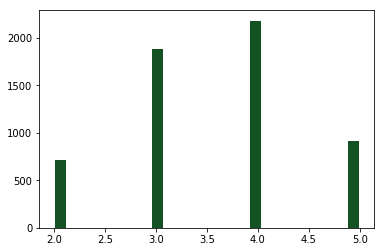

In [19]:
# df.hist(column='HHAGE', grid='off')
target = 'HHAGE'
plt.hist(df[target], bins=25, rwidth=0.9, color='#155223')
plt.savefig('output/'+target+'_hist_after.png', bbox_inches='tight', dpi=300)

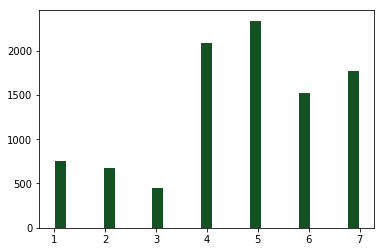

In [20]:
for target in temp_targets:
#     df.hist(column=target, grid='off')
    plt.hist(df[target], bins=25, rwidth=0.9, color='#155223')
    plt.savefig('output/'+target+'_hist_after.png', bbox_inches='tight', dpi=300)

In [21]:
'''
0 - 50
51 - 60
61 - 64
65 - 68
69 - 72
73 - 76
77 - 80
80 - 100
'''

'\n0 - 50\n51 - 60\n61 - 64\n65 - 68\n69 - 72\n73 - 76\n77 - 80\n80 - 100\n'

In [22]:
models = []

models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('ADB', AdaBoostClassifier()))
models.append(('RFC', RandomForestClassifier(n_estimators = 100, random_state = 0)))

In [23]:
cv_results_summary = {}
cv_results_dump = {}
for target in target_list:
    cv_results_summary[target] = {}
    cv_results_dump[target] = {}
    
# cv_scoring_metrics = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro', 'jaccard_macro']
cv_scoring_metrics = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

In [24]:
# function for training
def train_model(target_col, models):
    print("---TRAINING FOR " + target_col + " ---")

    X = df.drop(target_col, axis='columns')   #Feature Matrix
#     X = df.drop(target_list, axis='columns')   #Feature Matrix
    
    y = df[target_col]          #Target Variable

#     # create traing and test sets
#     X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

    # evaluate each model in turn
    accuracy_res = []
    names = []
    
    for name, model in models:
        kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
        
        cv_accuracy = []
        cv_results_summary[target_col][name] = {}
        cv_results_dump[target_col][name] = {}
        
        for metric in cv_scoring_metrics:
            cur_results = cross_val_score(model, X, y, cv=kfold, scoring=metric)
            cv_results_dump[target_col][name][metric] = cur_results            
            if metric == 'accuracy':
                cv_accuracy = cur_results
                
            cv_results_summary[target_col][name][metric + '_' + 'min'] = cur_results.min()
            cv_results_summary[target_col][name][metric + '_' + 'max'] = cur_results.max()
            cv_results_summary[target_col][name][metric + '_' + 'mean'] = cur_results.mean()
            cv_results_summary[target_col][name][metric + '_' + 'std'] = cur_results.std()                
                  
        
        accuracy_res.append(cv_accuracy)
        names.append(name)
        
        print('%s: Max: %f \tMean: %f \tSD: %f' % (name, cv_accuracy.max(), cv_accuracy.mean(), cv_accuracy.std()))
#         print('%s: Max: %f \tMean: %f \tSD: %f' % (name, cv_r2.max(), cv_r2.mean(), cv_r2.std()))
#         print('%s: Max: %f \tMean: %f \tSD: %f' % (name, cv_mae.max(), cv_mae.mean(), cv_mae.std()))
           
    print('\n\n')
       

    # Compare Algorithms
    pyplot.boxplot(accuracy_res, labels=names)
    plot_title = "Traning Accuracy for " + target_col
    pyplot.show()

---TRAINING FOR EQUIPMUSE ---
LDA: Max: 0.625000 	Mean: 0.604651 	SD: 0.016556
KNN: Max: 0.386643 	Mean: 0.369849 	SD: 0.016580
CART: Max: 0.639719 	Mean: 0.610621 	SD: 0.015058
SVM: Max: 0.380282 	Mean: 0.379177 	SD: 0.000869
ADB: Max: 0.609155 	Mean: 0.549597 	SD: 0.030371
RFC: Max: 0.693662 	Mean: 0.661802 	SD: 0.022295





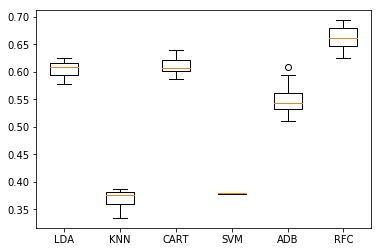




---TRAINING FOR TEMPHOME ---
LDA: Max: 0.588752 	Mean: 0.546604 	SD: 0.017870
KNN: Max: 0.407733 	Mean: 0.371073 	SD: 0.023312
CART: Max: 0.627417 	Mean: 0.591798 	SD: 0.022087
SVM: Max: 0.411972 	Mean: 0.411009 	SD: 0.000564
ADB: Max: 0.613357 	Mean: 0.547129 	SD: 0.037631
RFC: Max: 0.654930 	Mean: 0.630138 	SD: 0.020542





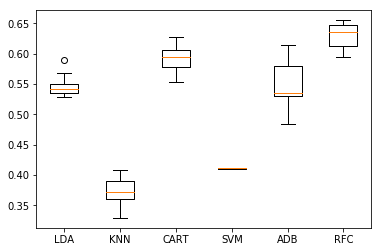




---TRAINING FOR TEMPGONE ---
LDA: Max: 0.550088 	Mean: 0.508617 	SD: 0.019037
KNN: Max: 0.355634 	Mean: 0.321845 	SD: 0.013929
CART: Max: 0.551845 	Mean: 0.519870 	SD: 0.020276
SVM: Max: 0.367958 	Mean: 0.366339 	SD: 0.000839
ADB: Max: 0.606327 	Mean: 0.562431 	SD: 0.024743
RFC: Max: 0.574692 	Mean: 0.545547 	SD: 0.013466





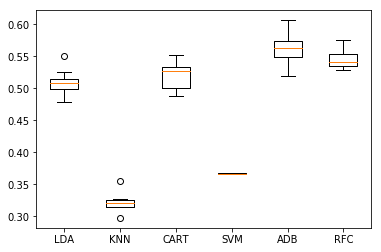




---TRAINING FOR TEMPNITE ---
LDA: Max: 0.521127 	Mean: 0.495953 	SD: 0.017322
KNN: Max: 0.367311 	Mean: 0.331862 	SD: 0.017580
CART: Max: 0.577465 	Mean: 0.551538 	SD: 0.016588
SVM: Max: 0.352113 	Mean: 0.351389 	SD: 0.000571
ADB: Max: 0.620387 	Mean: 0.582653 	SD: 0.026559
RFC: Max: 0.611599 	Mean: 0.581953 	SD: 0.012410





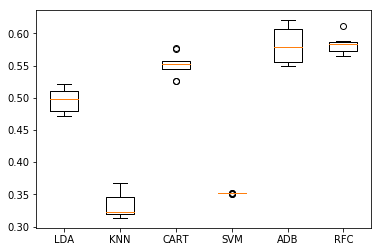




---TRAINING FOR USEWWAC ---
LDA: Max: 0.834798 	Mean: 0.827822 	SD: 0.005657
KNN: Max: 0.752197 	Mean: 0.735135 	SD: 0.008712
CART: Max: 0.868190 	Mean: 0.852263 	SD: 0.011764
SVM: Max: 0.755712 	Mean: 0.755013 	SD: 0.000715
ADB: Max: 0.864437 	Mean: 0.862646 	SD: 0.001905
RFC: Max: 0.887522 	Mean: 0.875307 	SD: 0.007376





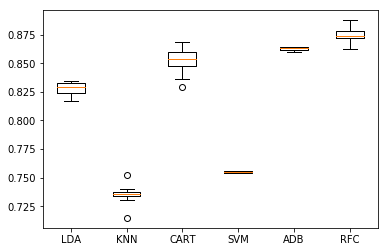




---TRAINING FOR TEMPHOMEAC ---
LDA: Max: 0.639719 	Mean: 0.622230 	SD: 0.015279
KNN: Max: 0.362676 	Mean: 0.317458 	SD: 0.023136
CART: Max: 0.674868 	Mean: 0.660039 	SD: 0.014267
SVM: Max: 0.297535 	Mean: 0.296870 	SD: 0.000841
ADB: Max: 0.622144 	Mean: 0.562616 	SD: 0.059589
RFC: Max: 0.694200 	Mean: 0.666548 	SD: 0.013400





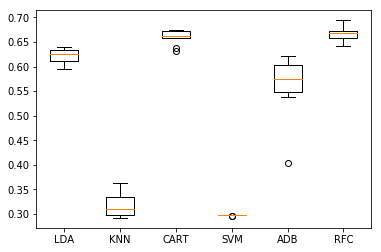




---TRAINING FOR TEMPGONEAC ---
LDA: Max: 0.602812 	Mean: 0.577733 	SD: 0.012421
KNN: Max: 0.344464 	Mean: 0.314981 	SD: 0.016062
CART: Max: 0.669014 	Mean: 0.627163 	SD: 0.020952
SVM: Max: 0.312830 	Mean: 0.311994 	SD: 0.000711
ADB: Max: 0.607394 	Mean: 0.465191 	SD: 0.077897
RFC: Max: 0.648506 	Mean: 0.635070 	SD: 0.009096





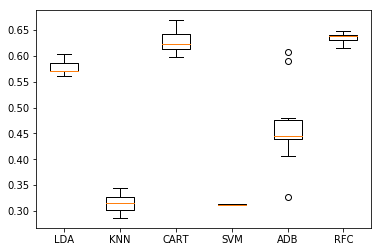




---TRAINING FOR TEMPNITEAC ---
LDA: Max: 0.557118 	Mean: 0.533944 	SD: 0.017299
KNN: Max: 0.312830 	Mean: 0.296690 	SD: 0.012495
CART: Max: 0.653169 	Mean: 0.612553 	SD: 0.021122
SVM: Max: 0.313380 	Mean: 0.312523 	SD: 0.000977
ADB: Max: 0.639719 	Mean: 0.574201 	SD: 0.043704
RFC: Max: 0.664323 	Mean: 0.633828 	SD: 0.017609





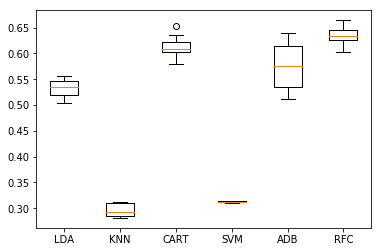




---TRAINING FOR HHAGE ---
LDA: Max: 0.611599 	Mean: 0.585827 	SD: 0.017086
KNN: Max: 0.428822 	Mean: 0.403800 	SD: 0.015383
CART: Max: 0.538732 	Mean: 0.516535 	SD: 0.011227
SVM: Max: 0.383803 	Mean: 0.383222 	SD: 0.000694
ADB: Max: 0.639719 	Mean: 0.586874 	SD: 0.032910
RFC: Max: 0.648506 	Mean: 0.609385 	SD: 0.020475





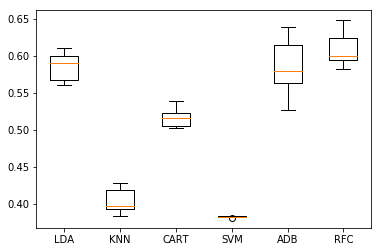




---TRAINING FOR EMPLOYHH ---
LDA: Max: 0.724077 	Mean: 0.700675 	SD: 0.015402
KNN: Max: 0.511424 	Mean: 0.481358 	SD: 0.016452
CART: Max: 0.648506 	Mean: 0.614491 	SD: 0.014910
SVM: Max: 0.477113 	Mean: 0.476610 	SD: 0.000411
ADB: Max: 0.746479 	Mean: 0.713516 	SD: 0.017198
RFC: Max: 0.730634 	Mean: 0.708059 	SD: 0.011748





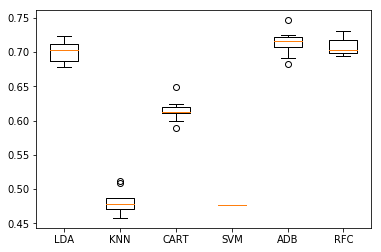




---TRAINING FOR EDUCATION ---
LDA: Max: 0.446397 	Mean: 0.397636 	SD: 0.023276
KNN: Max: 0.302285 	Mean: 0.281740 	SD: 0.018061
CART: Max: 0.357394 	Mean: 0.306373 	SD: 0.021944
SVM: Max: 0.333919 	Mean: 0.333274 	SD: 0.000666
ADB: Max: 0.407733 	Mean: 0.383923 	SD: 0.019633
RFC: Max: 0.430580 	Mean: 0.400274 	SD: 0.015094





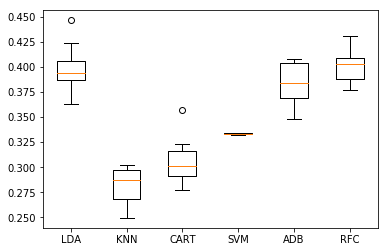




---TRAINING FOR NHSLDMEM ---
LDA: Max: 1.000000 	Mean: 0.955282 	SD: 0.132983
KNN: Max: 0.557118 	Mean: 0.533763 	SD: 0.014865
CART: Max: 0.996485 	Mean: 0.994724 	SD: 0.001761
SVM: Max: 0.369718 	Mean: 0.368801 	SD: 0.001012
ADB: Max: 0.369718 	Mean: 0.368801 	SD: 0.001012
RFC: Max: 0.772887 	Mean: 0.756772 	SD: 0.012886





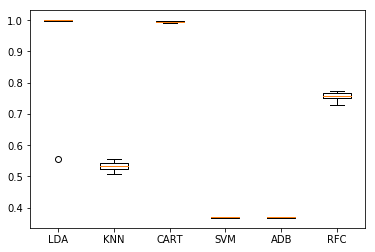




---TRAINING FOR NUMADULT ---
LDA: Max: 1.000000 	Mean: 0.960739 	SD: 0.117196
KNN: Max: 0.667838 	Mean: 0.636648 	SD: 0.015060
CART: Max: 0.998243 	Mean: 0.993493 	SD: 0.003855
SVM: Max: 0.544815 	Mean: 0.544495 	SD: 0.000393
ADB: Max: 0.786972 	Mean: 0.769610 	SD: 0.009752
RFC: Max: 0.786972 	Mean: 0.774005 	SD: 0.008270





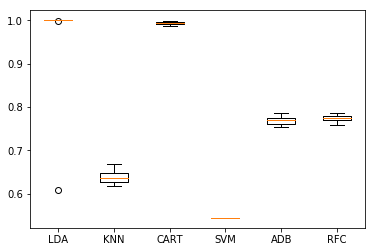




---TRAINING FOR NUMCHILD ---
LDA: Max: 1.000000 	Mean: 0.967663 	SD: 0.095258
KNN: Max: 0.698944 	Mean: 0.673941 	SD: 0.015486
CART: Max: 1.000000 	Mean: 0.992788 	SD: 0.004883
SVM: Max: 0.676626 	Mean: 0.676046 	SD: 0.000642
ADB: Max: 0.727113 	Mean: 0.692932 	SD: 0.019338
RFC: Max: 0.755712 	Mean: 0.745516 	SD: 0.010244





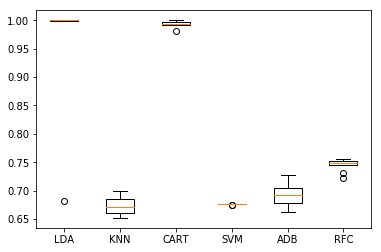




---TRAINING FOR ATHOME ---
LDA: Max: 0.565141 	Mean: 0.543082 	SD: 0.016388
KNN: Max: 0.461268 	Mean: 0.433879 	SD: 0.013049
CART: Max: 0.466549 	Mean: 0.439335 	SD: 0.017977
SVM: Max: 0.554577 	Mean: 0.553817 	SD: 0.000549
ADB: Max: 0.599297 	Mean: 0.576151 	SD: 0.016903
RFC: Max: 0.585237 	Mean: 0.573690 	SD: 0.008198





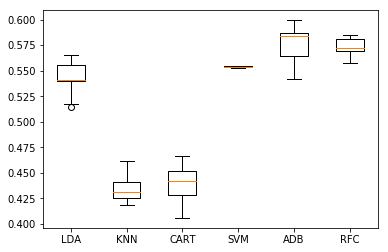




---TRAINING FOR MONEYPY ---
LDA: Max: 0.322183 	Mean: 0.308476 	SD: 0.009844
KNN: Max: 0.235501 	Mean: 0.214558 	SD: 0.013807
CART: Max: 0.295775 	Mean: 0.259931 	SD: 0.020690
SVM: Max: 0.223592 	Mean: 0.222301 	SD: 0.000913
ADB: Max: 0.371479 	Mean: 0.338725 	SD: 0.021020
RFC: Max: 0.366197 	Mean: 0.346991 	SD: 0.013148





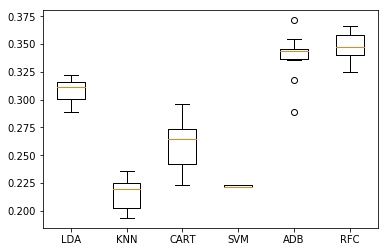

In [29]:
for target in target_list:
    train_model(target, models)
    print("\n\n")
#     break

In [26]:
print(cv_results_summary)
print(cv_results_dump)

{'EQUIPMUSE': {'LDA': {'accuracy_min': 0.5782073813708261, 'accuracy_max': 0.625, 'accuracy_mean': 0.6046511052253768, 'accuracy_std': 0.016556145953902195, 'f1_weighted_min': 0.5474813300564049, 'f1_weighted_max': 0.5964003989437384, 'f1_weighted_mean': 0.5756905441581214, 'f1_weighted_std': 0.016143973428141035, 'precision_weighted_min': 0.5630634057094134, 'precision_weighted_max': 0.6289355824619086, 'precision_weighted_mean': 0.6027049654270819, 'precision_weighted_std': 0.019887615004055934, 'recall_weighted_min': 0.5782073813708261, 'recall_weighted_max': 0.625, 'recall_weighted_mean': 0.6046511052253768, 'recall_weighted_std': 0.016556145953902195}, 'KNN': {'accuracy_min': 0.3345070422535211, 'accuracy_max': 0.3866432337434095, 'accuracy_mean': 0.3698491918116785, 'accuracy_std': 0.01658047879543229, 'f1_weighted_min': 0.3148051106215322, 'f1_weighted_max': 0.361733965105825, 'f1_weighted_mean': 0.3425102632267371, 'f1_weighted_std': 0.01504519229226299, 'precision_weighted_min

In [30]:
# store cross validation results in csv file

rows = []
row = ['Target', 'Model']

for metric in cv_scoring_metrics:
    row.append(metric + '_' + 'min')
    row.append(metric + '_' + 'max')
    row.append(metric + '_' + 'mean')
    row.append(metric + '_' + 'std')
rows.append(row)

for target in cv_results_summary.keys():
    for model in cv_results_summary[target].keys():
        row = [target, model]
        for value in cv_results_summary[target][model].values():
            row.append(value)
        rows.append(row)

with open('output/results.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

In [31]:
# store cross validation results dump in csv file
rows = []
for target in cv_results_dump.keys():
    for model in cv_results_dump[target].keys():
        for scale in cv_results_dump[target][model].keys():
            row = [target, model, scale]
            for value in cv_results_dump[target][model][scale]:
                row.append(value)        
            rows.append(row)

with open('output/result_dump.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

In [174]:
from sklearn.metrics import SCORERS
print (SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei